# Imersão dados

## graficos, time series e Analise exploratoria

### pre-sets

In [213]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

C:\Users\thiag\AppData\Local\Temp\ipykernel_8104\3614720279.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
C:\Users\thiag\AppData\Local\Temp\ipykernel_8104\3614720279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)


<AxesSubplot:ylabel='Frequency'>

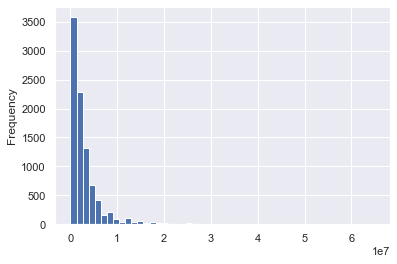

In [214]:
dados[["moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand=True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)

dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

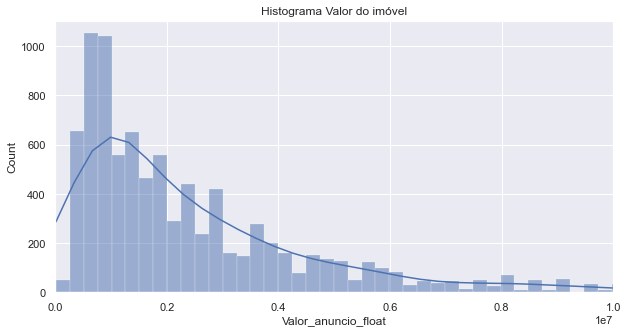

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 5))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde=True)
ax.set_title("Histograma Valor do imóvel")
plt.xlim((-50, 10000000))
plt.show()

### Metro quadrado do imóvel

In [216]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"] / dados_vendas["Metragem"]
dados_vendas.head()

C:\Users\thiag\AppData\Local\Temp\ipykernel_8104\4177765188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"] / dados_vendas["Metragem"]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7.00e+06,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3.70e+06,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,3.80e+05,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,6.85e+05,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,5.40e+05,5400.00


In [217]:
dados_vendas.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1.76e+06,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2.39e+06,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2.08e+06,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1.18e+06,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4.78e+06,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,6.52e+05,4467.13
Água Branca,173.58,3.08,3.25,2.25,1.23e+06,7269.11
Água Fria,165.42,2.83,3.42,2.50,9.27e+05,5841.10


### Dados bairro

In [218]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,1.39e+08,6.05e+05
Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04
Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05
Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05
Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04
Água Branca,2083,37,39,27,1.47e+07,8.72e+04
Água Fria,1985,34,41,30,1.11e+07,7.01e+04


In [219]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,1.39e+08,6.05e+05,7162.69
Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04,5708.74
Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05,6961.30
Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04,4283.84
Água Branca,2083,37,39,27,1.47e+07,8.72e+04,7065.77
Água Fria,1985,34,41,30,1.11e+07,7.01e+04,5604.53


In [220]:
dados_bairro.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem               3.91e+04
Quartos                5.73e+02
Banheiros              5.47e+02
Vagas                  4.99e+02
Valor_anuncio_float    2.99e+08
Valor_m2               1.34e+06
Valor_m2_bairro        7.66e+03
Name: Vila Mariana, dtype: float64

In [221]:

dados_bairro.loc["Vila Mariana"]

Metragem               3.91e+04
Quartos                5.73e+02
Banheiros              5.47e+02
Vagas                  4.99e+02
Valor_anuncio_float    2.99e+08
Valor_m2               1.34e+06
Valor_m2_bairro        7.66e+03
Name: Vila Mariana, dtype: float64

In [222]:
dados_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

### top_bairros

In [223]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [224]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,1.39e+08,6.05e+05,7162.69
1,Alto da Boa Vista,3351,33,41,37,1.91e+07,4.68e+04,5708.74
2,Alto da Lapa,23940,252,308,320,1.67e+08,6.09e+05,6961.30
3,Alto da Mooca,5401,66,52,73,2.37e+07,1.14e+05,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3.26e+06,2.23e+04,4283.84
693,Água Branca,2083,37,39,27,1.47e+07,8.72e+04,7065.77
694,Água Fria,1985,34,41,30,1.11e+07,7.01e+04,5604.53
695,Água Funda,278,6,5,4,1.09e+06,7.75e+03,3920.86


In [225]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1.76e+09,4.16e+06,11126.34
19,Brooklin Paulista,70002,778,862,832,4.76e+08,1.63e+06,6796.90
57,Cidade Jardim,132220,789,1008,1172,1.16e+09,1.64e+06,8805.10
155,Jardim Europa,118898,795,993,1056,2.41e+09,4.19e+06,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1.80e+09,2.83e+06,1852.65
187,Jardim Leonor,97141,697,941,902,6.46e+08,1.12e+06,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2.14e+09,4.28e+06,16395.70
338,Pacaembu,100285,774,889,1028,8.68e+08,1.75e+06,8654.90
396,Planalto Paulista,59250,636,768,713,3.75e+08,1.19e+06,6327.54
564,Vila Madalena,66250,739,786,712,5.83e+08,1.79e+06,8803.82


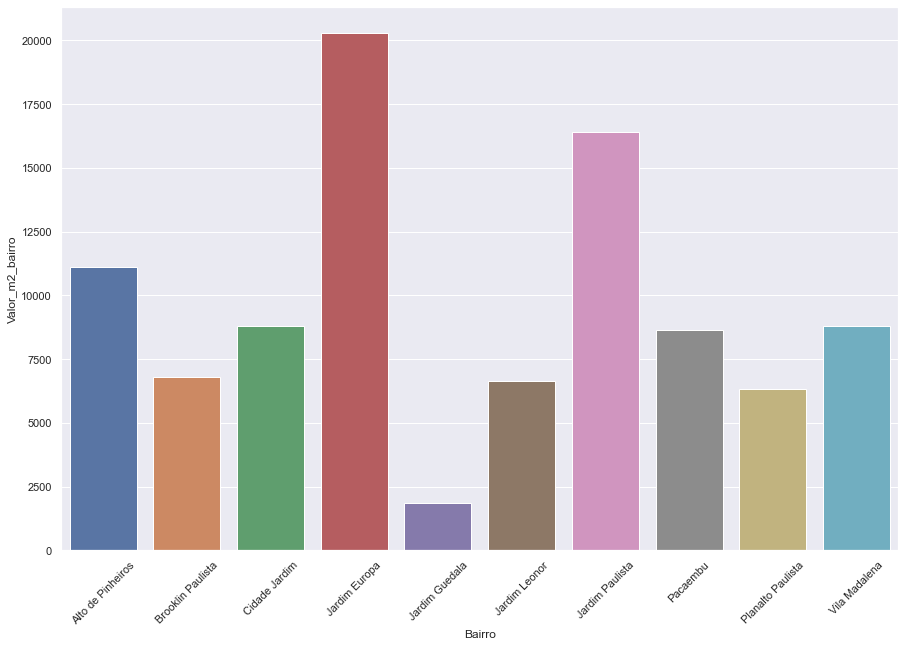

In [226]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

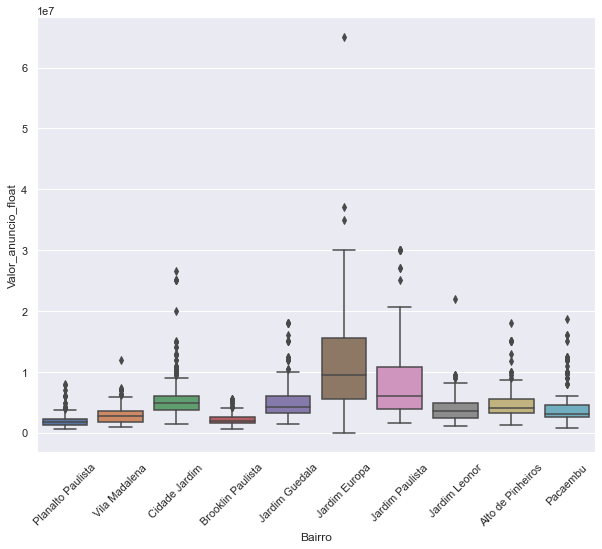

In [227]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

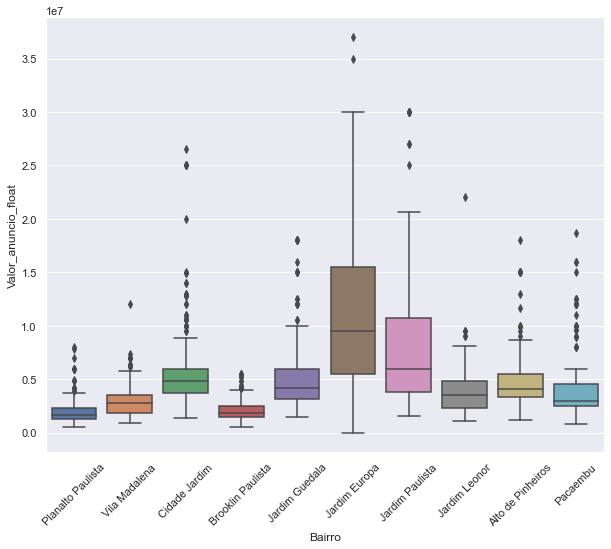

In [228]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros & Valor_anuncio_float < 40000000"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

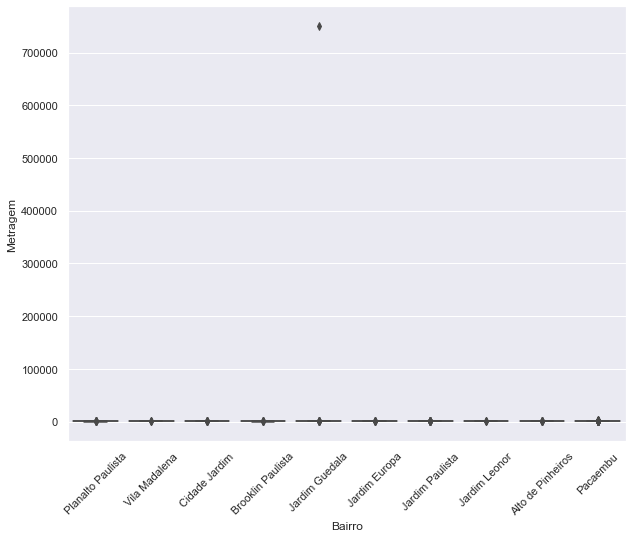

In [229]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

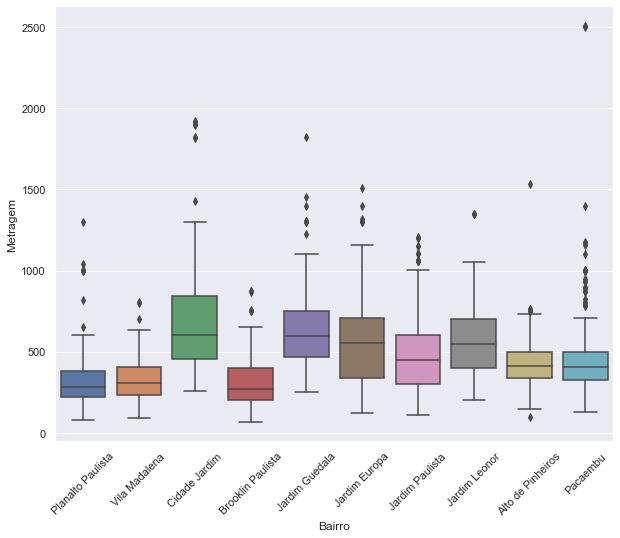

In [230]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

### Dado sujo do ibge

In [231]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.0
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.0
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.0
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.0
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.0
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.0
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.0
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.0
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN
